## **Machine Learning for Physics and Astronomy**

BSc program in Physics and Astronomy (Honours track), University van Amsterdam and Vrije Universiteit Amsterdam.

**Academic year 2021-2022**. 

Course instructors:

* Dr. Juan Rojo ([j.rojo@vu.nl](mailto:j.rojo@vu.nl))

* Dr. Tommaso Giani ([tgiani@nikhef.nl](mailto:tgiani@nikhef.nl))

* Mr. Ryan van Mastrigt ([ryanvmastrigt@gmail.com](mailto:ryanvmastrigt@gmail.com))
    
Lecture notes, tutorial notebooks, and other learning materials of the course can be found in its [GitHub repository](https://github.com/LHCfitNikhef/ML4PA)

## Tutorial 2a: Optimisation with Stochastic Gradient Descent in 1D

---


In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

In [ ]:

# Source: https://github.com/dtnewman/stochastic_gradient_descent

<b>Gradient descent</b>, also known as <b>steepest descent</b>, is an optimization algorithm for finding the local minimum of a function. To find a local minimum, the function "steps" in the  direction of the negative of the gradient. <b>Gradient ascent</b> is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums instead of minimums. The algorithm of gradient descent can be outlined as follows:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; choose $\alpha_k$ to minimize $f(x_k+\alpha_k s_k)$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha_k s_k$ <br>
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

As a simple example, let's find a local minimum for the function $f(x) = x^3-2x^2+2$

In [ ]:
#lambda functions are a way to write simple functions in a single line
f = lambda x: x**3-2*x**2+2

In [ ]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

We can see from plot above that our local minimum is gonna be near around 1.4 or 1.5 (on the x-axis), but let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$.

# Question 1b.1) Write out the gradient descent algorithm into the function below. What is the value at which the minimum occurs at a precision of $10^{-4}$?

In [ ]:
# returns the value of the derivative of our function
f_prime = lambda x: 3*x**2-4*x

# Starting from x_new, run the gradient descent step in a loop
# x_new indicates x0, n_k indicates the stepsize and the loop is terminated when the difference in x =< precision.
def simple_gradient_descent(x_old = 0, x_new = 2, n_k = .1, precision = .0001, step_limit = 10 ** 4):
    
    x_list, y_list = [x_new], [f(x_new)]

    for i in range(step_limit):
        x_old = x_new
        x_new = x_old - n_k * f_prime(x_new)

        x_list.append(x_new)
        y_list.append(f(x_new))

        if abs(x_old - x_new) <= precision:
            break
    
    print("Local minimum occurs at:", x_new)
    print("Number of steps:", len(x_list))
    if abs(x_old - x_new) > precision:
        print("Did not reach precision limit.")
    
    return x_list, y_list

The figures below show the route that was taken to find the local minimum.

In [ ]:
# Unhash the next line after the function is completed
x_list, y_list = simple_gradient_descent()

plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed in)")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3335])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.xticks([1.3333,1.3334,1.3335])
plt.show()

# Learning rate

You'll notice that the step size (also called learning rate) in the implementation above is constant, unlike the algorithm in the pseudocode. Doing this makes it easier to implement the algorithm. However, it also presents some issues: If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all. 

Choosing the correct learning rate, is a recurring problem in Machine Learning. Many ML algorithms have a hyperparameter that comes across with the learning rate, which needs to be tuned such that the algorithm functions optimally. A solution to this problem is to use adaptive step sizes by using scipy's fmin function to find optimal step sizes.

# Question 1b.2) Copy the simple_gradient_descent and integrate the following two lines such that the learning rate becomes adaptive. How many steps are now needed to reach the same precision?

In [ ]:
# we setup this function to pass into the fmin algorithm
f2 = lambda n, x, s: f(x + n*s)

def adaptive_gradient_descent(x_old = 0, x_new = 2, precision = .0001, step_limit = 10 ** 3):
    
    x_list, y_list = [x_new], [f(x_new)]
    
    for i in range(step_limit):
        x_old = x_new

        s_k = -f_prime(x_new)

        # use following line containing scipy fmin function to find ideal step size.
        n_k = fmin(f2,0.1,(x_old, s_k), full_output = False, disp = False)

        x_new = x_old + n_k * s_k

        x_list.append(x_new)
        y_list.append(f(x_new))
    
        if abs(x_old - x_new) <= precision:
            break
    
    print("Local minimum occurs at:", x_new)
    print("Number of steps:", len(x_list))
    # print(x_old, x_new)
    if abs(x_old - x_new) > precision:
        print("Did not reach precision limit.")
    
    return x_list, y_list

plt.plot(adaptive_gradient_descent()[0])

Of course, this improvement does not come for free. Now, it takes time to compute the appropriate step size at each iteration. Here are some plots of the path taken below. You can see that it converges very quickly to a point near the local minimum, so it's hard to even discern the dots after the first two steps until we zoom in very close in the third frame below:

In [ ]:
# Unhash the next line after the function is completed
x_list, y_list = adaptive_gradient_descent()

plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("zoomed in")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3334,1.3336])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.xticks([1.3334,1.3335,1.3336])
plt.show()

Another (more simple) approach to update the step size is choosing a decrease constant $d$ that shrinks the step size after each iteration:

$\eta(t+1) = \eta(t) / (1+t \times d)$.

# Question 1b.3) Repeat previous exercise for the decreasing learning rate gradient descent.

Local minimum occurs at: 1.380731017904384
Number of steps: 12


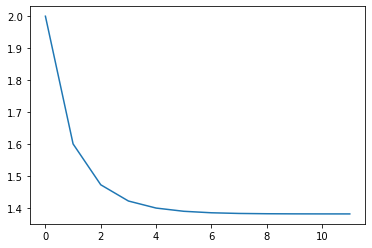

In [67]:
def decreasing_rate_gradient_descent(x_old = 0, x_new = 2, precision = .0001, t = 0., d = .01, step_limit = 10 ** 3):
    x_list, y_list = [x_new], [f(x_new)]

    n_k = 0.1
    for t in np.linspace(t, step_limit):
        x_old = x_new
        x_new = x_old - n_k * f_prime(x_new)

        x_list.append(x_new)
        y_list.append(f(x_new))

        n_k = n_k / (1 + t * d)

        if abs(x_old - x_new) <= precision:
            break
    
    print("Local minimum occurs at:", x_new)
    print("Number of steps:", len(x_list))
    if abs(x_old - x_new) > precision:
        print("Did not reach precision limit.")
    
    return x_list, y_list

# Plot x_list to see convergence
plt.plot(decreasing_rate_gradient_descent()[0])

# Linear regression using gradient descent method

Let's now consider a real-world example that we may encounter in practice. Consider a simple linear regression  problem where we want to see how the temperature affects the noises made by crickets. We have a data set of cricket chirp rates at various temperatures. First we'll load that data set in and plot it:

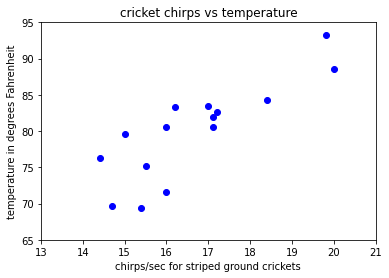

In [70]:
#Load the dataset
data = np.loadtxt('tutorial2_SGD_data.txt', delimiter=',')
 
#Plot the data
plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.xlim([13,21])
plt.ylim([65,95])
plt.show()

Our goal is to find the equation of the straight line $h_\theta(x) = \theta_0 + \theta_1 x$ that best fits our data points. The function that we are trying to minimize in this case is:

$J(\theta_0,\theta_1) = {1 \over 2m} \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2$

This function should look familiar to you from the previous notebook.

However, since this function depends on two variables, our gradient will be defined in two dimensions:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

Below, we set up our function for h, J and the gradient:

In [71]:
#h is a straight line function: ax + b
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x


def J(x, y, theta_0, theta_1):
    return np.sum((h(theta_0, theta_1, x) - y)**2)/(2*len(x))


def grad_J(x,y,theta_0,theta_1):
    
    dJ_d0 = np.sum((h(theta_0, theta_1, x) - y))
    dJ_d1 = np.sum((h(theta_0, theta_1, x) - y)*x)

    return np.array([dJ_d0, dJ_d1])/len(x)

Now, we'll load our data into the x and y variables;

In [77]:
x = data[:, 0]
y = data[:, 1]
m = len(x)

And we run our gradient descent algorithm (without adaptive step sizes in this example):

In [78]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.001 # step size
precision = 0.001
num_steps = 0
s_k = float("inf")

while np.linalg.norm(s_k) > precision:
    num_steps += 1
    theta_old = theta_new
    s_k = -grad_J(x,y,theta_old[0],theta_old[1])
    theta_new = theta_old + n_k * s_k

print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])
print("This took",num_steps,"steps to converge")

Local minimum occurs where:
theta_0 = 25.12855255859539
theta_1 = 3.2972647562518955
This took 565859 steps to converge


For comparison, let's get the actual values for $\theta_0$ and $\theta_1$:

In [79]:
actualvalues = sp.stats.linregress(x,y)
print("Actual values for theta are:")
print("theta_0 =", actualvalues.intercept)
print("theta_1 =", actualvalues.slope)

Actual values for theta are:
theta_0 = 25.23230498342602
theta_1 = 3.291094567947565


So we see that our values are relatively close to the actual values (even though our method was pretty slow). If you look at the source code of [linregress](https://github.com/scipy/scipy/blob/master/scipy/stats/_stats_mstats_common.py), it uses the convariance matrix of x and y to compute fastly. Below, you can see a plot of the line drawn with our theta values against the data:

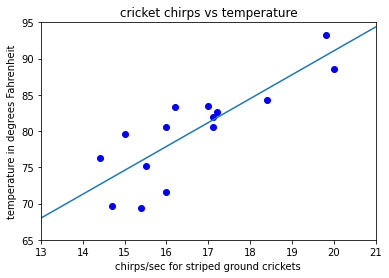

In [80]:
xx = np.linspace(0,21,1000)
plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
plt.plot(xx,h(theta_new[0],theta_new[1],xx))
plt.xlim([13,21])
plt.ylim([65,95])
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.show()

Notice that in the method above we need to calculate the gradient in every step of our algorithm. In the example with the crickets, this is not a big deal since there are only 15 data points. But imagine that we had 10 million data points. If this were the case, it would certainly make the method above far less efficient.

In machine learning, the algorithm above is often called <b>batch gradient descent</b> to contrast it with <b>mini-batch gradient descent</b> (which we will not go into here) and <b>stochastic gradient descent</b>.

# Stochastic gradient descent

As we said above, in batch gradient descent, we must look at every example in the entire training set on every step (in cases where a training set is used for gradient descent). This can be quite slow if the training set is sufficiently large. In <b>stochastic gradient descent</b>, we update our values after looking at <i>each</i> item in the training set, so that we can start making progress right away. Recall the linear regression example above. In that example, we calculated the gradient for each of the two theta values as follows:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

Where $h_\theta(x) = \theta_0 + \theta_1 x$

Then we followed this algorithm (where $\alpha$ was a non-adapting stepsize):

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha s_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>

When the sample data had 15 data points as in the example above, calculating the gradient was not very costly. But for very large data sets, this would not be the case. So instead, we consider a stochastic gradient descent algorithm for simple linear regression such as the following, where m is the size of the data set:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Randomly shuffle the data set <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>for</b> i = 1 to m <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\begin{bmatrix}
 \theta_{1} \\ 
 \theta_2 \\ 
 \end{bmatrix}=\begin{bmatrix}
 \theta_1 \\ 
 \theta_2 \\ 
 \end{bmatrix}-\alpha\begin{bmatrix}
 2(h_\theta(x_i)-y_i) \\ 
 2x_i(h_\theta(x_i)-y_i) \\ 
 \end{bmatrix}$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>end for</b> <br> 
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

Typically, with stochastic gradient descent, you will run through the entire data set 1 to 10 times (see value for k in line 2 of the pseudocode above), depending on how fast the data is converging and how large the data set is.

With batch gradient descent, we must go through the entire data set before we make any progress. With this algorithm though, we can make progress right away and continue to make progress as we go through the data set. Therefore, stochastic gradient descent is often preferred when dealing with large data sets.

Unlike gradient descent, stochastic gradient descent will tend to oscillate <i>near</i> a minimum value rather than continuously getting closer. It may never actually converge to the minimum though. One way around this is to slowly decrease the step size $\alpha$ as the algorithm runs. However, this is less common than using a fixed $\alpha$.

Let's look at another example where we illustrate the use of stochastic gradient descent for linear regression. In the example below, we'll create a set of 500,000 points around the line $y = 2x+17+\epsilon$, for values of x between 0 and 100:

In [87]:
f = lambda x: x*2+17+np.random.randn(len(x))*10

x = np.random.random(500000)*100
y = f(x) 
m = len(y)

First, let's randomly shuffle around our dataset. Note that in this example, this step isn't strictly necessary since the data is already in a random order. However, that obviously may not always be the case:

In [88]:
from random import shuffle

x_shuf = []
y_shuf = []
index_shuf = list(range(len(x)))
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])

x = x_shuf
y = y_shuf

Now we'll setup our h function and our cost function, which we will use to check how the value is improving.

In [89]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x
cost = lambda theta_0,theta_1, x_i, y_i: 0.5*(h(theta_0,theta_1,x_i)-y_i)**2

Now we'll run our stochastic gradient descent algorithm. To see it's progress, we'll take a cost measurement at every step. Every 10,000 steps, we'll get an average cost from the last 10,000 steps and then append that to our cost_list variable. We will run through the entire list 10 times here:

In [90]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.000005 # step size

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

loops = 10

for j in range(loops):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        s_k[0] = (h(theta_old[0],theta_old[1],x[i])-y[i])
        s_k[1] = (h(theta_old[0],theta_old[1],x[i])-y[i])*x[i]
        s_k = (-1)*s_k
        theta_new = theta_old + n_k * s_k
        sum_cost += cost(theta_old[0],theta_old[1],x[i],y[i])
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost/10000.0)
            sum_cost = 0   
            
print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])

Local minimum occurs where:
theta_0 = 16.984847317438927
theta_1 = 2.0132137472411675


As you can see, our values for $\theta_0$ and $\theta_1$ are close to their true values of 17 and 2.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations.

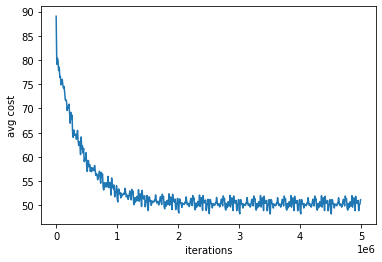

In [91]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()

# Question 1b.4) It can be drawn from the previous plot that the algorithm converges around 2 million iterations. How many times did we run through the entire population at this point?

That would be around  $ \frac{(2 * 10 ** 6)}{m} = 4$, four times ran through the entire dataset.